<h1> IMPORT DATASET AND PACKAGES </h1>

In [12]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from plotly.graph_objs import Scatter
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Figure, Histogram, Layout
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [14]:
data = pd.read_csv("wineFinal.csv")

In [13]:
# Read csv file
dataOriginal = pd.read_csv("wineFinal.csv") 
# Check first few 
dataOriginal.head()



FileNotFoundError: [Errno 2] File b'wineFinal.csv' does not exist: b'wineFinal.csv'

<h1> DATA CLEANING </h1>

In [3]:
# What is the index.
dataOriginal.index

RangeIndex(start=0, stop=23434, step=1)

In [4]:
# Types of column
dataOriginal.dtypes

Unnamed: 0            int64
wine_alcohol        float64
wine_category        object
wine_description     object
wine_name            object
wine_origin          object
wine_point            int64
wine_price            int64
wine_variety         object
dtype: object

In [5]:
# To check any column that has missing or NA value. 
dataOriginal.isna().any()

Unnamed: 0          False
wine_alcohol        False
wine_category       False
wine_description    False
wine_name           False
wine_origin         False
wine_point          False
wine_price          False
wine_variety        False
dtype: bool

In [6]:
# To drop missing values
dataOriginal = dataOriginal.dropna(axis=0, how='any')
# To check if missing values were taken away.
dataOriginal.isna().any()

Unnamed: 0          False
wine_alcohol        False
wine_category       False
wine_description    False
wine_name           False
wine_origin         False
wine_point          False
wine_price          False
wine_variety        False
dtype: bool

In [7]:
dataOriginal.shape

(23434, 9)

In [11]:
# Let's get only number value from wine_alcohol (take away %)
dataOriginal['wine_alcohol'] = dataOriginal.wine_alcohol.str.extract('(\d+\.?\d*)').astype(float)
dataOriginal

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [10]:
sum(dataOriginal.wine_alcohol > 100)

0

In [ ]:
# wine alcohol can't be over 100 so get rid of those that have over 100%
dataOriginal = dataOriginal[dataOriginal.wine_alcohol < 100]
dataOriginal

In [ ]:
# Also too many countries. I want to focus only those that have significant amounts, in this case putting as 200. 
group_origin = dataOriginal.groupby('wine_origin')
grorsize = group_origin.size()
grorsize[grorsize>200]

In [ ]:
#data to only those Countries with at least 200 records
data = dataOriginal.loc[dataOriginal['wine_origin'].isin(['Argentina','Australia','Austria','Chile','France','Germany','Italy','New Zealand','Portugal','Spain','US'])]
data

In [ ]:
#to write as a csv
data.to_csv('wineFinal.csv')

<h1> BASIC INFORMATION ON THIS DATA </h1>

In [15]:
data['wine_price'].mean()

38.26423145856448

In [16]:
data['wine_point'].mean()

89.23909703849108

In [17]:
data['wine_alcohol'].mean()

13.58958223094654

Red            13685
White           7150
Sparkling       1134
Rose            1133
Dessert          196
Port/Sherry      116
Fortified         20
dtype: int64


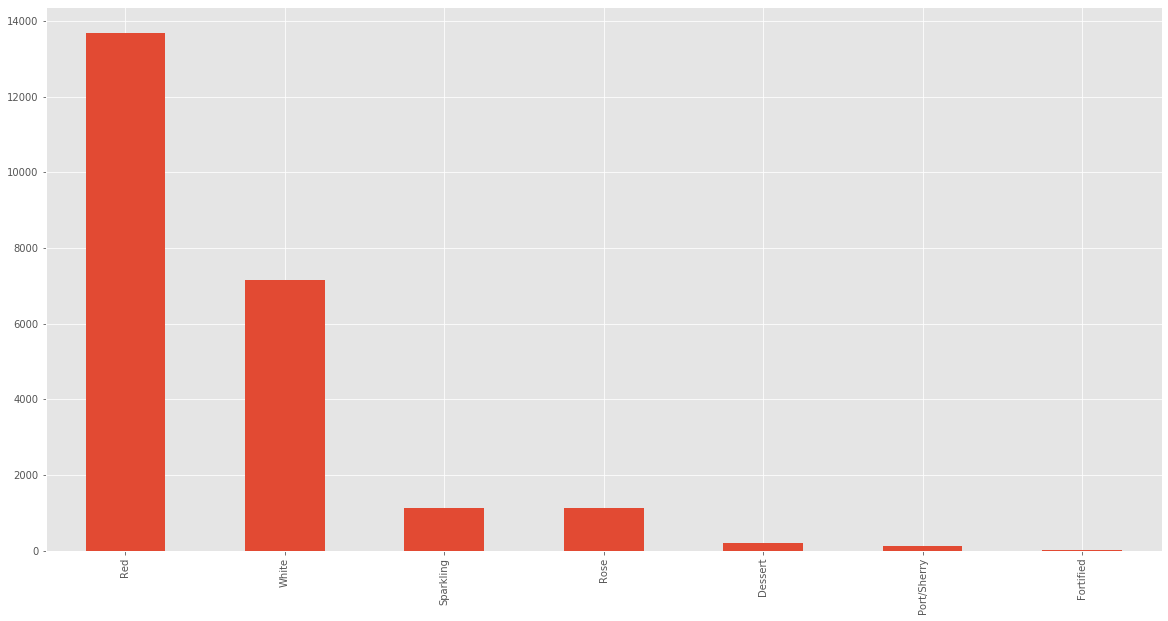

In [18]:
# What is under wine_category
count_wine_category = pd.value_counts(data['wine_category'].values, sort=True)
print(count_wine_category)

# bar graph for wine_category
count_wine_category.plot.bar(figsize = (20,10))


In [19]:
# Group by category
group_category = data.groupby('wine_category')
list(group_category)

[('Dessert',        Unnamed: 0  wine_alcohol wine_category  \
  36             38          11.5       Dessert   
  41             43          10.0       Dessert   
  47             49           8.0       Dessert   
  65             67          11.0       Dessert   
  120           122           9.0       Dessert   
  795           818          13.0       Dessert   
  1017         1046          14.5       Dessert   
  1292         1328          15.0       Dessert   
  1514         1556           7.0       Dessert   
  1517         1559           7.5       Dessert   
  1538         1580           6.5       Dessert   
  1553         1595          10.5       Dessert   
  3006         3080          14.6       Dessert   
  3588         3684          14.0       Dessert   
  3674         3771          13.5       Dessert   
  3711         3810          14.5       Dessert   
  3763         3863          10.5       Dessert   
  3770         3870          13.5       Dessert   
  3838         3941 

In [20]:
meanG_category = group_category.mean()
print(meanG_category)
medianG_category = group_category.median()
print(medianG_category)

                 Unnamed: 0  wine_alcohol  wine_point  wine_price
wine_category                                                    
Dessert        11637.882653     12.452041   90.520408   48.581633
Fortified      13195.350000     18.585000   90.050000   86.900000
Port/Sherry     8944.827586     19.254310   91.318966   57.387931
Red            12211.073365     14.030562   89.472707   44.015564
Rose           15454.913504     12.995993   87.547220   19.720212
Sparkling       8654.238095     12.031305   89.122575   42.430335
White          12734.699720     13.012066   89.007413   28.804895
               Unnamed: 0  wine_alcohol  wine_point  wine_price
wine_category                                                  
Dessert            9746.0          13.0        90.0        33.5
Fortified         14190.5          19.0        89.0        41.5
Port/Sherry        6579.0          20.0        91.0        40.0
Red               12069.0          14.0        89.0        35.0
Rose              1703

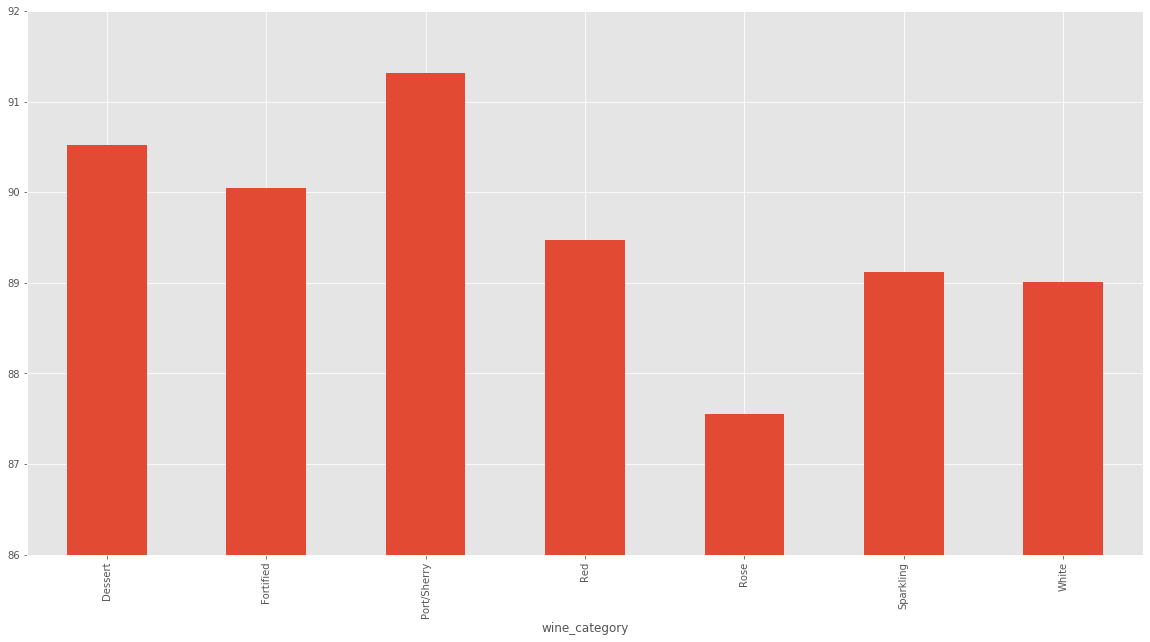

In [21]:
meanG_category['wine_point'].plot.bar(figsize = (20,10), ylim=(86,92))

In [ ]:
medianG_category['wine_price'].plot.bar(figsize = (20,10), ylim=(5,45))

In [ ]:
medianG_category['wine_alcohol'].plot.bar(figsize = (20,10), ylim = (8,22))

US             10342
France          4650
Italy           3269
Portugal        1235
Spain           1076
Chile            603
Austria          552
Germany          513
Argentina        495
Australia        388
New Zealand      311
dtype: int64


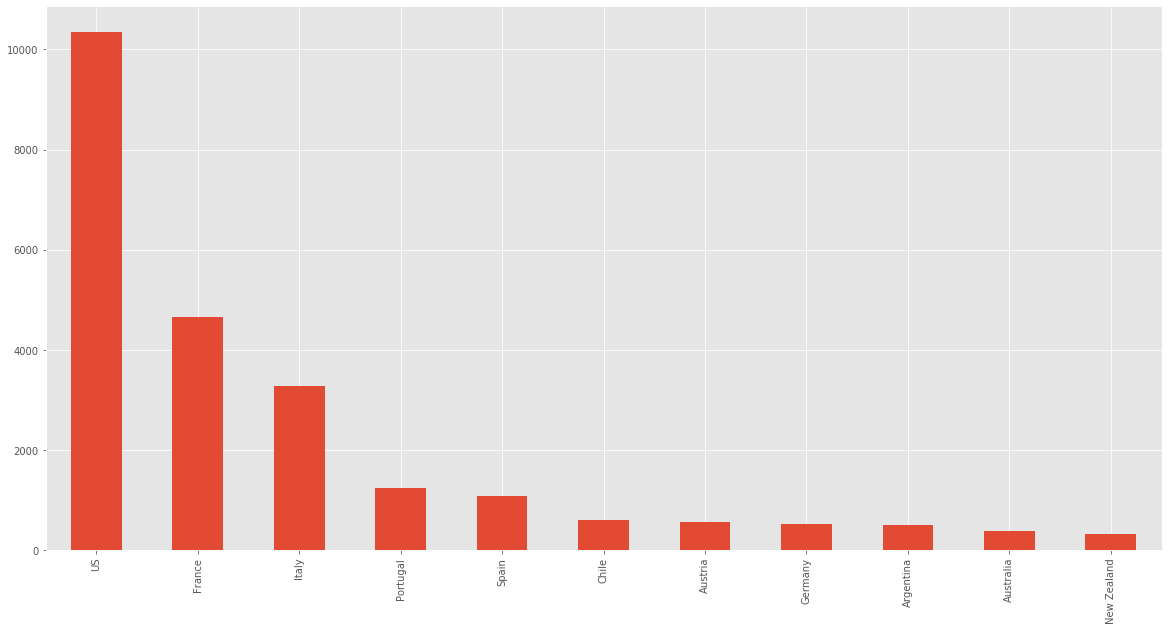

In [22]:
# What is under wine_origin
count_wine_origin = pd.value_counts(data['wine_origin'].values, sort=True)
print(count_wine_origin)

# bar graph for wine_origin
count_wine_origin.plot.bar(figsize = (20,10))

In [ ]:
group_origin0 = data.groupby('wine_origin')

meanG_origin = group_origin0.mean()
print(meanG_origin)
medianG_origin = group_origin0.median()
print(medianG_origin)

In [ ]:
medianG_origin['wine_alcohol'].plot.bar(ylim=(10,15), figsize = (20,10))

In [ ]:
meanG_origin['wine_point'].plot.bar(ylim = (85,92), figsize = (20,10))

In [ ]:
medianG_origin['wine_price'].plot.bar(figsize=(20,10) ,ylim = (10,40))

In [ ]:
# Group by variety
group_variety = data.groupby('wine_variety')
list(group_variety)

In [ ]:
# What is under wine_variety
count_wine_variety = pd.value_counts(data['wine_variety'].values, sort=True)

# Only top 10 of wine_variety
top_wine_variety = count_wine_variety[:10]
print(top_wine_variety)

# bar graph for wine_variety
top_wine_variety.plot.bar(figsize = (20,10))

In [ ]:
Top10 = data.loc[data['wine_variety'].isin(['Nebbiolo','Pinor Noir','Chardonnay','Bordeaux-style Red Blend',
                                    'Cabernet Sauvignon','Syrah','Red Blends',
                                    'Riesling','Rosé','Sauvignon Blanc'])]
Top10

In [ ]:
Top10_group_variety = Top10.groupby('wine_variety')
list(Top10_group_variety)

In [ ]:
meanGTop10_variety = Top10_group_variety.mean()
print(meanGTop10_variety)
medianGTop10_variety = Top10_group_variety.median()
print(medianGTop10_variety)

In [ ]:
medianGTop10_variety['wine_price'].plot.bar(figsize=(20,10))

In [ ]:
meanGTop10_variety['wine_point'].plot.bar(figsize=(20,10),ylim = (84,92))

In [ ]:
medianGTop10_variety['wine_alcohol'].plot.bar(figsize=(20,10), ylim=(10,15))

In [ ]:
alcohol100=data.sort_values('wine_alcohol', ascending=False)[:100]
alcohol100

In [ ]:
pd.value_counts(alcohol100['wine_category'].values, sort=True)

In [ ]:
pd.value_counts(alcohol100['wine_origin'].values, sort=True)

In [ ]:
alcohol100['wine_price'].mean()

In [ ]:
# histogram for the wine alcohol 
AlcU30 = data.loc[data['wine_alcohol']<25]
dataAlcohol = [Histogram(x=AlcU30['wine_alcohol'])]
layout = Layout(title="{Alcohol Content of Wine}",bargap=0.01)   
fig = Figure(data=dataAlcohol, layout=layout)
fig.update_xaxes(title_text='Alcohol Content (%)', nticks=20)
fig.update_yaxes(title_text='Count')
plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [ ]:
point100 = data.sort_values('wine_point', ascending=False)[:100]
point100

In [ ]:
pd.value_counts(point100['wine_category'].values, sort=True)

In [ ]:
pd.value_counts(point100['wine_origin'].values, sort=True)

In [ ]:
print(point100['wine_point'].mean())
print(point100['wine_point'].max())
print(point100['wine_point'].min())

In [ ]:
# histogram for the wine point
dataPoint = [Histogram(x=data['wine_point'])]
layout = Layout(title="{Distribution of Points of Wine Given by Wine Enthusiast Mag}",bargap=0.01)   
fig = Figure(data=dataPoint, layout=layout)
fig.update_xaxes(title_text='Point')
fig.update_yaxes(title_text='Count')

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [ ]:
#what are top 100 expensive wines and their prices. 
price100 = data.sort_values('wine_price', ascending=False)[:100]
price100

In [ ]:
pd.value_counts(price100['wine_category'].values, sort=True)

In [ ]:
pd.value_counts(price100['wine_origin'].values, sort=True)

In [ ]:
# Plotting the wine price to see its distribution. 

dataPrice = [Histogram(x=data['wine_price'])]
layout = Layout(title="{Price of Wine}",bargap=0.01, )   
fig = Figure(data=dataPrice, layout=layout)
fig.update_xaxes(title_text='Price ($)')
fig.update_yaxes(title_text='Count')

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

<h1> VARIABLES vs. PRICE </h1>

In [ ]:
# wine alcohol content vs. price
dataAlcPrice = [Scatter(x=data['wine_alcohol'], y=data['wine_price'], mode = 'markers', text=data['wine_variety'])]
layout = Layout(title="Alcohol Content vs Price")

fig = Figure(data=dataAlcPrice, layout=layout)
fig.update_xaxes(title_text='Alcohol Content (%)')
fig.update_yaxes(title_text='Price ($)')

plotly.offline.iplot(fig, show_link=False)

In [ ]:
# origin vs. price
dataOrgPrice = [Scatter(x=data['wine_origin'], y=data['wine_price'], mode = 'markers', text=data['wine_variety'])]
layout = Layout(title="Wine Origin by Country vs Price")

fig = Figure(data=dataOrgPrice, layout=layout)
fig.update_xaxes(title_text='Country')
fig.update_yaxes(title_text='Price ($)')

plotly.offline.iplot(fig, show_link=False)

In [ ]:
# category vs. price
dataCatPrice = [Scatter(x=data['wine_category'], y=data['wine_price'], mode = 'markers', text=data['wine_name'])]
layout = Layout(title="Wine Category vs Price")

fig = Figure(data=dataCatPrice, layout=layout)
fig.update_xaxes(title_text='Category')
fig.update_yaxes(title_text='Price ($)')

plotly.offline.iplot(fig, show_link=False)

In [ ]:
# variety vs. price
dataVarPrice = [Scatter(x=data['wine_variety'], y=data['wine_price'], mode = 'markers', text=data['wine_name'])]
layout = Layout(title="Wine Variety vs Price")

fig = Figure(data=dataVarPrice, layout=layout)
fig.update_xaxes(title_text='Variety')
fig.update_yaxes(title_text='Price ($)')

plotly.offline.iplot(fig, show_link=False)


dataVarPrice = [Scatter(x=Top10['wine_variety'], y=Top10['wine_price'], mode = 'markers', text=data['wine_name'])]
layout = Layout(title="Wine Top 10 Variety vs Price")

fig = Figure(data=dataVarPrice, layout=layout)
fig.update_xaxes(title_text='Variety')
fig.update_yaxes(title_text='Price ($)')

plotly.offline.iplot(fig, show_link=False)

In [ ]:
# points vs. price
dataPointPrice = [Scatter(x=data['wine_point'], y=data['wine_price'], mode = 'markers', text=data['wine_name'])]
layout = Layout(title="Wine Point vs Price")

fig = Figure(data=dataPointPrice, layout=layout)
fig.update_xaxes(title_text='Point')
fig.update_yaxes(title_text='Price ($)')

plotly.offline.iplot(fig, show_link=False)

<h1> WHAT EACH COUNTRY PRODUCE? </h1>

In [ ]:
data['wine_origin'].unique()

In [ ]:
#Italy
OriItaly = data.loc[data['wine_origin'] =='Italy']
OriItaly

In [ ]:
# Italy variety
count_OriItaly = pd.value_counts(OriItaly['wine_variety'].values, sort=True)

# Only top 10 of Italy
top_OriItaly = count_OriItaly[:10]
print(top_OriItaly)



In [ ]:
#dataOriItaly = [Histogram(x=top_OriItaly['wine_variety'])]
#layout = Layout(title="Different Varieties of Wine Produced From Italy")

top_OriItaly.plot.bar()

#fig = Figure(data=dataOriItaly, layout=layout)
#fig.update_xaxes(title_text='Variety')
#fig.update_yaxes(title_text='Count')

#plotly.offline.iplot(fig, show_link=False)

In [ ]:
#France
OriFrance = data.loc[data['wine_origin'] =='France']
OriFrance


In [ ]:
# France variety
count_OriFrance = pd.value_counts(OriFrance['wine_variety'].values, sort=True)

# Only top 10 of France
top_OriFrance = count_OriFrance[:10]
print(top_OriFrance)

top_OriFrance.plot.bar()

#dataOriFrance = [Histogram(x=OriFrance['wine_variety'])]
#layout = Layout(title="Different Varieties of Wine Produced From France")

#fig = Figure(data=dataOriFrance, layout=layout)
#fig.update_xaxes(title_text='Variety')
#fig.update_yaxes(title_text='Count')

#plotly.offline.iplot(fig, show_link=False)

In [ ]:
#US
OriUS = data.loc[data['wine_origin'] =='US']
OriUS
#dataOriUS = [Histogram(x=OriUS['wine_variety'])]
#layout = Layout(title="Different Varieties of Wine Produced From US")

#fig = Figure(data=dataOriUS, layout=layout)
#fig.update_xaxes(title_text='Variety')
#fig.update_yaxes(title_text='Count')

#plotly.offline.iplot(fig, show_link=False)

# US variety
count_OriUS = pd.value_counts(OriUS['wine_variety'].values, sort=True)

# Only top 10 of Italy
top_OriUS = count_OriUS[:10]
print(top_OriUS)

top_OriUS.plot.bar()

In [ ]:
#Australia
OriAustralia = data.loc[data['wine_origin'] =='Australia']
OriAustralia
#dataOriAustralia = [Histogram(x=OriAustralia['wine_variety'])]
#layout = Layout(title="Different Varieties of Wine Produced From Australia")

#fig = Figure(data=dataOriAustralia, layout=layout)
#fig.update_xaxes(title_text='Variety')
#fig.update_yaxes(title_text='Count')
#plotly.offline.iplot(fig, show_link=False)

# Australia variety
count_OriAustralia = pd.value_counts(OriAustralia['wine_variety'].values, sort=True)

# Only top 10 of Australia
top_OriAustralia = count_OriAustralia[:10]
print(top_OriAustralia)

top_OriAustralia.plot.bar()

In [ ]:
#Argentina
OriArgentina = data.loc[data['wine_origin'] =='Argentina']
OriArgentina
#dataOriArgentina = [Histogram(x=OriArgentina['wine_variety'])]
#layout = Layout(title="Different Varieties of Wine Produced From Argentina")
#fig = Figure(data=dataOriArgentina, layout=layout)
#fig.update_xaxes(title_text='Variety')
#fig.update_yaxes(title_text='Count')
#plotly.offline.iplot(fig, show_link=False)

# Argentina variety
count_OriArgentina = pd.value_counts(OriArgentina['wine_variety'].values, sort=True)

# Only top 10 of Argentina
top_OriArgentina = count_OriArgentina[:10]
print(top_OriArgentina)

top_OriArgentina.plot.bar()

In [ ]:
#Spain
OriSpain = data.loc[data['wine_origin'] =='Spain']
OriSpain
#dataOriSpain = [Histogram(x=OriSpain['wine_variety'])]
#layout = Layout(title="Different Varieties of Wine Produced From Spain")

#fig = Figure(data=dataOriSpain, layout=layout)
#fig.update_xaxes(title_text='Variety')
#fig.update_yaxes(title_text='Count')

#plotly.offline.iplot(fig, show_link=False)

# Spain variety
count_OriSpain = pd.value_counts(OriSpain['wine_variety'].values, sort=True)

# Only top 10 of Spain
top_OriSpain = count_OriSpain[:10]
print(top_OriSpain)

top_OriSpain.plot.bar()

In [ ]:
#Chile
OriChile = data.loc[data['wine_origin'] =='Chile']
OriChile

count_OriChile = pd.value_counts(OriChile['wine_variety'].values, sort=True)

top_OriChile = count_OriChile[:10]
print(top_OriChile)

top_OriChile.plot.bar()

In [ ]:
#Austria
OriAustria = data.loc[data['wine_origin'] =='Austria']
OriAustria
#dataOriAustria = [Histogram(x=OriAustria['wine_variety'])]
#layout = Layout(title="Different Varieties of Wine Produced From Austria")

#fig = Figure(data=dataOriAustria, layout=layout)
#fig.update_xaxes(title_text='Variety')
#fig.update_yaxes(title_text='Count')

#plotly.offline.iplot(fig, show_link=False)

# Austria variety
count_OriAustria = pd.value_counts(OriAustria['wine_variety'].values, sort=True)

# Only top 10 of Austria
top_OriAustria = count_OriAustria[:10]
print(top_OriAustria)

top_OriAustria.plot.bar()

In [ ]:
#Portugal
OriPortugal = data.loc[data['wine_origin'] =='Portugal']
OriPortugal
#dataOriPortugal = [Histogram(x=OriPortugal['wine_variety'])]
#layout = Layout(title="Different Varieties of Wine Produced From Portugal")

#fig = Figure(data=dataOriPortugal, layout=layout)
#fig.update_xaxes(title_text='Variety')
#fig.update_yaxes(title_text='Count')

#plotly.offline.iplot(fig, show_link=False)

# Portugal variety
count_OriPortugal = pd.value_counts(OriPortugal['wine_variety'].values, sort=True)

# Only top 10 of Portugal
top_OriPortugal = count_OriPortugal[:10]
print(top_OriPortugal)

top_OriPortugal.plot.bar()

In [ ]:
data['wine_category'].unique()


In [ ]:
#'Sparkling', 'Dessert', 'Rose', 'Port/Sherry']

Red_data = data.loc[data.wine_category=='Red']['wine_origin']
White_data = data.loc[data.wine_category=='White']['wine_origin']
Sparkling_data = data.loc[data.wine_category=='Sparkling']['wine_origin']
Dessert_data = data.loc[data.wine_category=='Dessert']['wine_origin']
Rose_data = data.loc[data.wine_category=='Rose']['wine_origin']
Port_data = data.loc[data.wine_category=='Port/Sherry']['wine_origin']
Fortified_data = data.loc[data.wine_category == 'Fortified']['wine_origin']

#getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':0.5}

trace0 = Histogram(x=Red_data,name='Red')

trace1 = Histogram(x=White_data,name='White')

trace2 = Histogram(x=Sparkling_data, name = 'Sparkling')

trace3 = Histogram(x=Dessert_data, name = 'Dessert')

trace4 = Histogram(x=Rose_data, name = 'Rose')

trace5 = Histogram(x=Port_data, name = 'Port/Sherry')

trace6 = Histogram(x=Fortified_data, name = 'Fortified')

dataStacked = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]   
# this is how we use different bars to graph together. -> for plotly, need to manually split the dataset

layout = Layout(title="Wine Production by Country",
               bargroupgap=0.1)
fig = Figure(data=dataStacked, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)


<h1> WordCloud </h1>

In [ ]:
#stopwords
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors", "aroma", "aromas", "finish", "note", "show", "notes"])

In [ ]:
#WordCloud for all wines
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=2000, width=1000, height=600,colormap = plt.cm.inferno, scale = 2.0)
wc.generate(' '.join(data['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3> WordCloud for each category </h3>

In [ ]:
RedWC = data[data['wine_category'] == 'Red']
RedWC

In [ ]:
#WordCloud for Red
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=2000, width=1000, height=600,colormap = plt.cm.inferno, scale = 2.0)
wc.generate(' '.join(RedWC['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
WhiteWC = data[data['wine_category'] == 'White']
WhiteWC

In [ ]:
#WordCloud for White
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=2000, width=1000, height=600,colormap = plt.cm.inferno, scale = 2.0)
wc.generate(' '.join(RedWC['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
SparklingWC = data[data['wine_category'] == 'Sparkling']
SparklingWC

In [ ]:
#WordCloud for Sparkling
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=2000, width=1000, height=600,colormap = plt.cm.inferno, scale = 2.0)
wc.generate(' '.join(SparklingWC['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
DessertWC = data[data['wine_category'] == 'Dessert']
DessertWC

In [ ]:
#WordCloud for dessert
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=2000, width=1000, height=600,colormap = plt.cm.inferno, scale = 2.0)
wc.generate(' '.join(DessertWC['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
RoseWC = data[data['wine_category'] == 'Rose']
RoseWC

In [ ]:
#WordCloud for Rose
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=2000, width=1000, height=600,colormap = plt.cm.inferno, scale = 2.0)
wc.generate(' '.join(RoseWC['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
PortWC = data[data['wine_category'] == 'Port/Sherry']
PortWC

In [ ]:
#WordCloud for Port/Sherry
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=2000, width=1000, height=600,colormap = plt.cm.inferno, scale = 2.0)
wc.generate(' '.join(PortWC['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data.loc[data['wine_category'] == 'Port/Sherry']